# Lab 8: Define and Solve an ML Problem of Your Choosing

In [100]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [101]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# Safe file to dataframe:
df = pd.read_csv(WHRDataSet_filename, header=0)

# Create a copy of dataframe (this is for the ensemble modeling at the end):
df_copy = df.copy()

# Checking dataset with .info() and .head():
df.info()
df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


From the info section, we can gather the following information:

    1. We have a total of 1562 data points.
    2. There are 19 columns.
    3. A majority of the columns contain missing values:
        - Log GDP per capita
        - Social support
        - Healthy life expectancy at birth
        - Freedom to make life choices
        - Generosity
        - Perceptions of corruption
        - Positive affect
        - Negative affect
        - Confidence in national government
        - Democratic quality
        - Delivery quality
        - GINI index (World Bank estimate)
        - GINI index (World Bank estimate), average 2000-15
        - gini of household income reported in Gallup, by wp5-year
    4. All the features except for "country" are represented numerically. This means that we can keep feature transformation steps to a minimum!

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I selected the "World Happiness Report" data set.

2. I will be predicting the "Life Ladder" value of a country given the other feature values. That is, "Life Ladder" will serve as my label. From a quick search online, this column is a rating given by residents of a country that represents their satisfaction and happiness with their lives in their country.

3. This is a supervised learning problem that involves regression (the label ranges from a scale of 0 to 10, with 0 representing the worst possible life and 10 representing the best possible life).

4. Currently, it seems as if all the features are relevant with the exception of "country", "year", "Standard deviation of ladder by country-year", and "Standard deviation/Mean of ladder by country-year". Intuitively speaking, I feel as though these features are intended to classify the data or exist as statistical companions to the data and lack significant predictive value for the purposes of my ML problem. I want my model to predict the happiness of a country based on its conditions ONLY. However, I should also consider the fact that the country name may capture political or cultural differences that are not apparent in the rest of the features. I will be dropping "year" and the standard deviations at the very least.

5. This is an important problem because it allows others to predict the happiness of a country based on some shift in the given feature values (i.e. you can use the model to predict how the happiness of a country will change if the economy improved by a set amount or if people gained more confidence in their national government). These predictions can then be used to make real policy decisions.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

DATA PREPARATION:

We've already established that many of the features contain missing values, so it's worthwhile to examine the extent of the missingness.

In [102]:
# Examine how many values are missing and in which columns these are most prominent:
nan_count = np.sum(df.isnull(), axis=0)
print("Missing values by column:\n")
print(nan_count)

Missing values by column:

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard devi

Some columns contain more missing values than others. We already know from previous examinination that all the columns containing missing values are floating point values, so we can perform a simple averaging step for these. 

HOWEVER, notice that the "GINI index (World Bank estimate)" has 979 missing values, and there are 1562 entries total for this column. This means that over half of the data is missing for this feature, so I have decided to drop it entirely instead of using it for training. Furthermore, after researching what the difference between "GINI index (World Bank estimate)" and "GINI index (World Bank estimate), average 2000-15" is, it turns out that the former is a value reported annually on household income inequality whereas the latter is a 15 year average of the GINI index. So, even though we're dropping a significant feature, we still capture some of its contributions in the average.

But wait! If you look back to the information given to us using df.head(), it appears that some countries don't even have a GINI index average filled out for ANY of the years they're reported for (i.e. Afghanistan). Since the GINI average is consistent for a 15 year duration, I was planning on extracting it from one field for a country and substituting it into the fields with missing values for the same country. I'm leaning towards dropping the GINI index average too now, but I want to check to see what other features are entirely missing first.

In [103]:
# Drop "GINI index (World Bank estimate)":
df = df.drop(columns=["GINI index (World Bank estimate)"])

# Drop "year":
df = df.drop(columns=["year"])

# Drop "Standard deviation of ladder by country-year":
df = df.drop(columns=["Standard deviation of ladder by country-year"])

# Drop "Standard deviation/Mean of ladder by country-year":
df = df.drop(columns=["Standard deviation/Mean of ladder by country-year"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   Life Ladder                                               1562 non-null   float64
 2   Log GDP per capita                                        1535 non-null   float64
 3   Social support                                            1549 non-null   float64
 4   Healthy life expectancy at birth                          1553 non-null   float64
 5   Freedom to make life choices                              1533 non-null   float64
 6   Generosity                                                1482 non-null   float64
 7   Perceptions of corruption                                 1472 non-null   float64
 8   Positive affect   

To ensure that calculating the averages or performing data substitutions is feasible for the other fields of each country, I'm going to group the rest of the data by country first, then check to see what the state of their missing values is.

In [104]:
# Create a list of country names:
country_list = df["country"].unique().tolist()
print("List of countries:\n")
print(country_list)

List of countries:

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Le

Now that we have a list of countries, we can iterate over it and examine if any of the features completely missing from the data.

In [105]:
def find_countries_with_fully_missing_features(df, target_col="Life Ladder", id_col="country"):
    """
    Returns a summary DataFrame of countries with features that are completely missing (NaN) across all years.

    Parameters:
    - df (pd.DataFrame): The full dataset
    - target_col (str): The column to exclude from feature analysis (e.g., "Life Ladder")
    - id_col (str): The identifier column for grouping (e.g., "country")

    Returns:
    - missing_df (pd.DataFrame): A DataFrame listing which features are fully missing per country
    """
    missing_features_table = {}
    
    # Features to check (excluding target and ID column)
    features = df.columns.difference([id_col, target_col])
    country_list = df[id_col].unique().tolist()
    
    for country in country_list:
        country_data = df[df[id_col] == country][features]
        is_fully_missing_series = country_data.isnull().all()
        missing_columns = is_fully_missing_series[is_fully_missing_series].index.tolist()
        
        if missing_columns:
            missing_features_table[country] = missing_columns

    # Create output DataFrame
    missing_df = pd.DataFrame.from_dict(missing_features_table, orient='index')
    missing_df.columns = [f"Missing field {i+1}" for i in range(missing_df.shape[1])]
    missing_df.index.name = "Country"
    
    return missing_df

In [106]:
missing_df = find_countries_with_fully_missing_features(df)

# Display summary table:
print("Dimensions:", missing_df.shape)
missing_df.head(30)

Dimensions: (30, 6)


,Missing field 1,Missing field 2,Missing field 3,Missing field 4,Missing field 5,Missing field 6
Country,,,,,,
Afghanistan,"GINI index (World Bank estimate), average 2000-15",None,None,None,None,None
Algeria,Confidence in national government,None,None,None,None,None
Bahrain,Confidence in national government,"GINI index (World Bank estimate), average 2000-15",None,None,None,None
Belize,"GINI index (World Bank estimate), average 2000-15",None,None,None,None,None
Cambodia,"GINI index (World Bank estimate), average 2000-15",None,None,None,None,None
China,Confidence in national government,Perceptions of corruption,None,None,None,None
Cuba,"GINI index (World Bank estimate), average 2000-15",Generosity,Perceptions of corruption,"gini of household income reported in Gallup, b...",None,None
Djibouti,"gini of household income reported in Gallup, b...",None,None,None,None,None
Guyana,"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, b...",None,None,None,None


OBSERVATION:

"Confidence in national government" and "GINI index (World Bank estimate), average 2000-15" are missing in a significant number of these countries. Furthermore, many of these countries seem to have regional overlap (i.e. Middle East, North Africa, etc.). Since I want my model to be as representative as possible globally, instead of dropping these countries, I will be dropping the features themselves instead. 

NOTE: 

Another way of handling this problem would be to handle this problem would be to categorize countries by their geopolitical and cultural similarities and then taking the average of the values available and then using them as substitutes. However, I do not have the domain knowledge to appropriately categorize these countries.

In [107]:
# Drop "GINI index (World Bank estimate), average 2000-15":
df = df.drop(columns=["GINI index (World Bank estimate), average 2000-15"])

# Drop "Confidence in national government":
df = df.drop(columns=["Confidence in national government"])

# Repeat the summary table to see what's left:
missing_df = find_countries_with_fully_missing_features(df)

print("Dimensions:", missing_df.shape)
missing_df.head(11)

Dimensions: (11, 5)


,Missing field 1,Missing field 2,Missing field 3,Missing field 4,Missing field 5
Country,,,,,
China,Perceptions of corruption,None,None,None,None
Cuba,Generosity,Perceptions of corruption,"gini of household income reported in Gallup, b...",None,None
Djibouti,"gini of household income reported in Gallup, b...",None,None,None,None
Guyana,"gini of household income reported in Gallup, b...",None,None,None,None
Kosovo,Delivery Quality,Democratic Quality,None,None,None
North Cyprus,Delivery Quality,Democratic Quality,Generosity,Healthy life expectancy at birth,Log GDP per capita
Oman,Perceptions of corruption,Positive affect,Social support,None,None
Palestinian Territories,Delivery Quality,Democratic Quality,None,None,None
Somalia,Generosity,Log GDP per capita,None,None,None


OBSERVATION:

Of the countries remaining, some have significant numbers of features missing entirely. By "significant numbers of features", I mean two or more. Because so much data is incomplete, I will be dropping these countries from the dataset.

In [108]:
# Drop Cuba, Kosovo, North Cyprus, Oman, Palestinian Territories, Somalia, and Somaliland region:
countries_to_drop = ["Cuba", "Kosovo", "North Cyprus", "Oman", "Palestinian Territories", "Somalia", "Somaliland region"]

df = df[~df["country"].isin(countries_to_drop)]

missing_df = find_countries_with_fully_missing_features(df)

print("Dimensions:", missing_df.shape)
missing_df.head(4)

Dimensions: (4, 1)


,Missing field 1
Country,
China,Perceptions of corruption
Djibouti,"gini of household income reported in Gallup, b..."
Guyana,"gini of household income reported in Gallup, b..."
Turkmenistan,Perceptions of corruption


OBSERVATION:

I have a choice here: I can either drop the two features that are missing, or I can drop the countries instead. Because there are only four countries in this list, I'm leaning towards dropping the countries. Later, if I discover that the features I've selected pose issues in terms of correlation coefficients or mutual information values, I might revert this change.

In [109]:
# Drop China, Djibouti, Guyana, and Turkmenistan:
countries_to_drop = ["China", "Djibouti", "Guyana", "Turkmenistan"]

df_cleaned = df[~df["country"].isin(countries_to_drop)]

Now I need to handle missing values in general. I will be substituting the missing feature values by taking the average for a country.

In [110]:
def fill_missing_features_by_country_average(df, features, id_col="country"):
    """
    Fill missing values in the feature columns using the country-specific mean for each feature.
    
    Parameters:
    - df (pd.DataFrame): Cleaned DataFrame with country and feature columns.
    - features (list): List of features to impute.
    - id_col (str): The column that identifies each country.
    
    Returns:
    - df_filled (pd.DataFrame): A copy of df with missing feature values filled.
    """
    df_filled = df.copy()
    
    for feature in features:
        df_filled[feature] = df.groupby(id_col)[feature].transform(lambda x: x.fillna(x.mean()))
        
    return df_filled

In [111]:
# Create a list that identifies what features remain:
id_col = "country"
target_col = "Life Ladder"

print("Columns remaining in processed dataframe:\n")
print(df_cleaned.columns)

selected_features = df_cleaned.columns.difference([id_col, target_col]).tolist()
print("\nSelected features:\n\n", selected_features)

Columns remaining in processed dataframe:

Index(['country', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Democratic Quality', 'Delivery Quality',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

Selected features:

 ['Delivery Quality', 'Democratic Quality', 'Freedom to make life choices', 'Generosity', 'Healthy life expectancy at birth', 'Log GDP per capita', 'Negative affect', 'Perceptions of corruption', 'Positive affect', 'Social support', 'gini of household income reported in Gallup, by wp5-year']


In [112]:
# Fill in the missing features with their country-specific averages:
df_filled = fill_missing_features_by_country_average(df_cleaned, selected_features)

df_filled.info()

# Check the missing values again:
nan_count = np.sum(df_filled.isnull(), axis=0)
print("\nMissing values by column:\n")
print(nan_count)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1561
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1500 non-null   object 
 1   Life Ladder                                               1500 non-null   float64
 2   Log GDP per capita                                        1500 non-null   float64
 3   Social support                                            1500 non-null   float64
 4   Healthy life expectancy at birth                          1500 non-null   float64
 5   Freedom to make life choices                              1500 non-null   float64
 6   Generosity                                                1500 non-null   float64
 7   Perceptions of corruption                                 1500 non-null   float64
 8   Positive affect   

Now that I've taken care of missing values, I need to check for outliers for each feature. It's important to perform this step before I look at correlations because outliers can significantly distort correlation values. Since I don't exactly have a good idea of the shapes of the distributions for my features, I will graph them to visualize the situation.

In [113]:
# Display summary statistics:
df_filled[selected_features].describe()

,Delivery Quality,Democratic Quality,Freedom to make life choices,Generosity,Healthy life expectancy at birth,Log GDP per capita,Negative affect,Perceptions of corruption,Positive affect,Social support,"gini of household income reported in Gallup, by wp5-year"
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.021068,-0.107085,0.731272,0.001545,62.276327,9.231267,0.264388,0.746354,0.709062,0.811372,0.448363
std,0.979285,0.870343,0.144609,0.163619,8.028493,1.198264,0.082483,0.190113,0.107688,0.120298,0.103862
min,-1.900852,-2.448228,0.257534,-0.322952,37.766476,6.377396,0.094316,0.035198,0.362498,0.290184,0.244813
25%,-0.714758,-0.753249,0.635519,-0.111074,57.122100,8.295688,0.206298,0.687968,0.621785,0.748148,0.372181
50%,-0.197523,-0.197343,0.748546,-0.021688,63.920893,9.418533,0.252736,0.803232,0.718179,0.836037,0.427605
75%,0.745860,0.705611,0.846935,0.095192,68.199045,10.226751,0.310607,0.876761,0.799767,0.904864,0.513261
max,2.184725,1.540097,0.985178,0.677773,76.536362,11.770276,0.704590,0.983276,0.943621,0.987343,0.961435


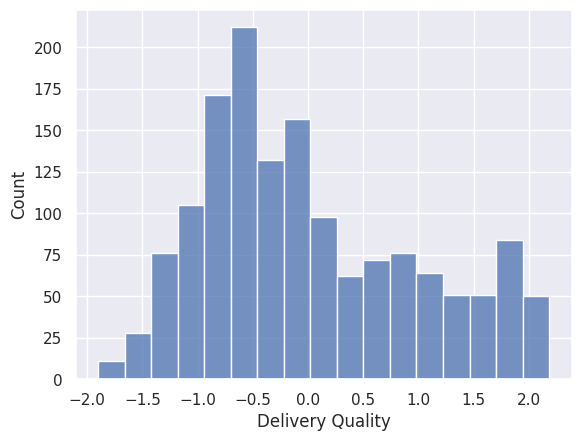

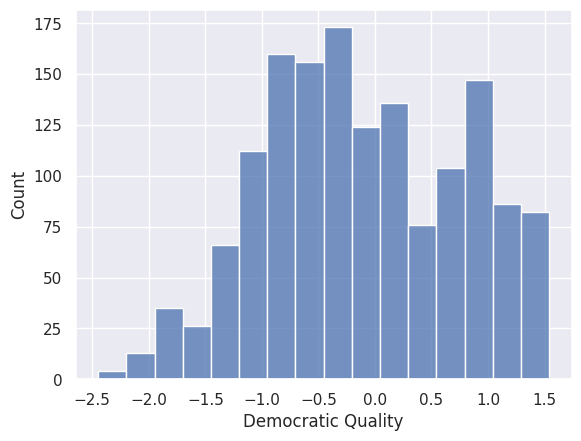

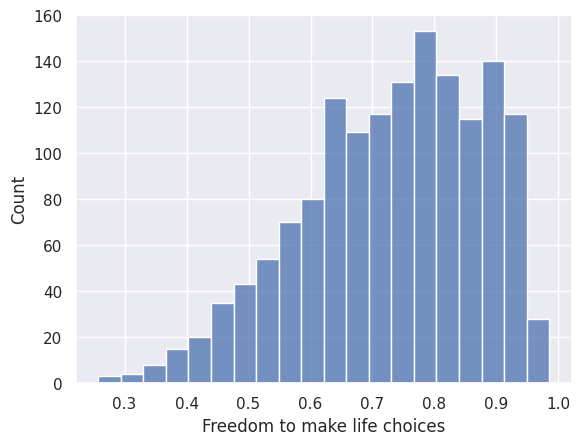

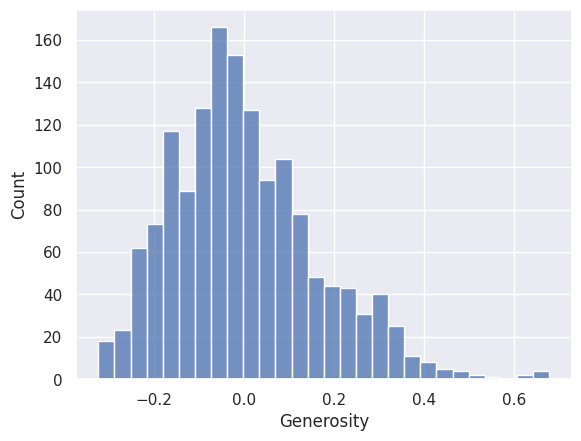

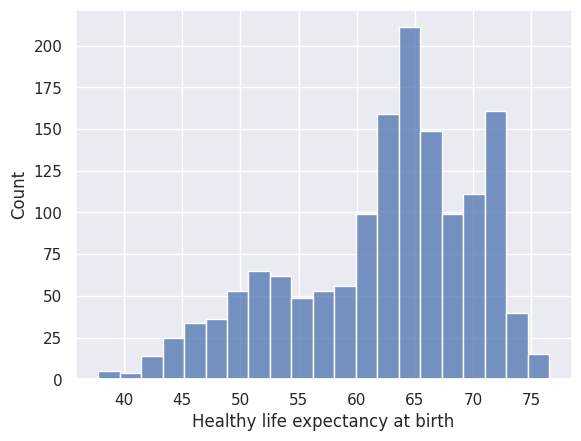

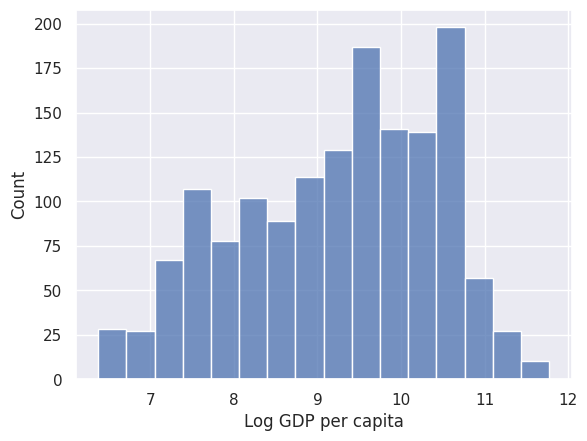

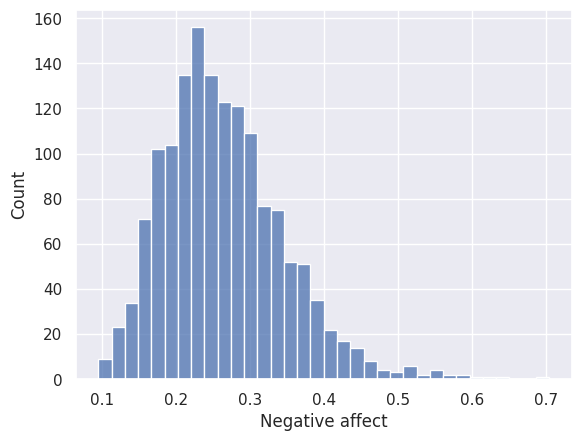

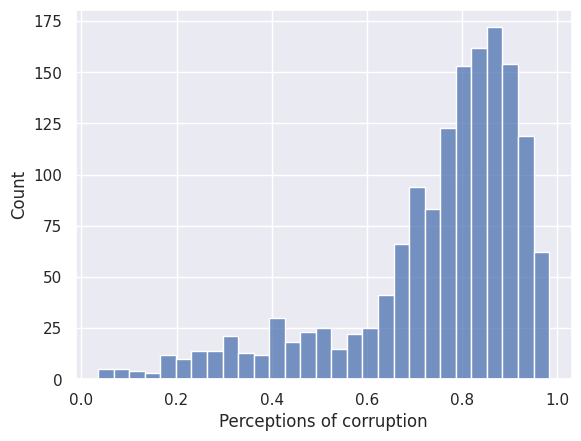

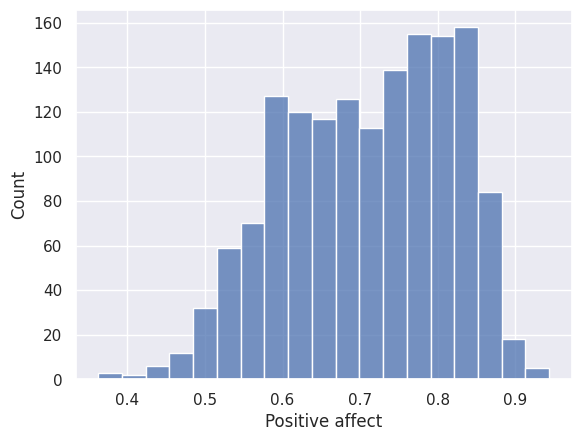

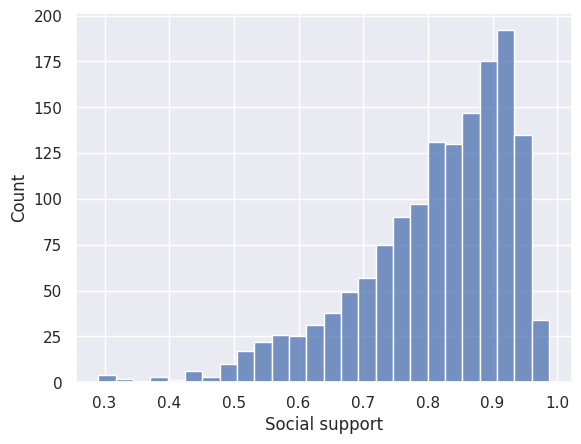

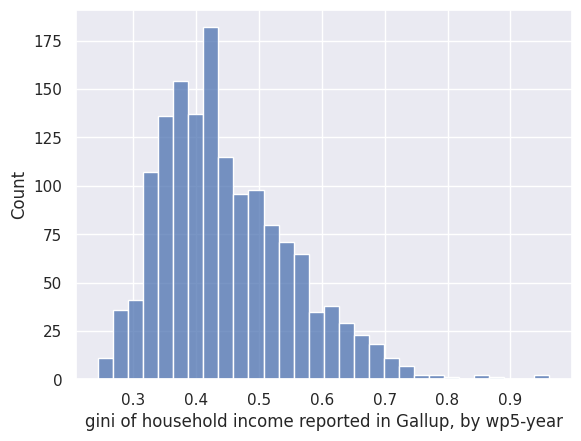

In [114]:
# Use histograms to examine distributions:
sns.set_theme()

for feature in selected_features:
    sns.histplot(data=df_filled, x=feature)
    plt.show()

It would appear that most if not all of these features exhibit a skewed distribution. Since Z-scores rely on the standard deviation and mean to detect outliers, they don't work particularly well with skewed distributions. Furthermore, the underlying assumption behind using Z-scores is that the distribution is a bell-shaped curve, which is not the case here. Instead, I'll be turning to boxplots and IQR for outlier detection.

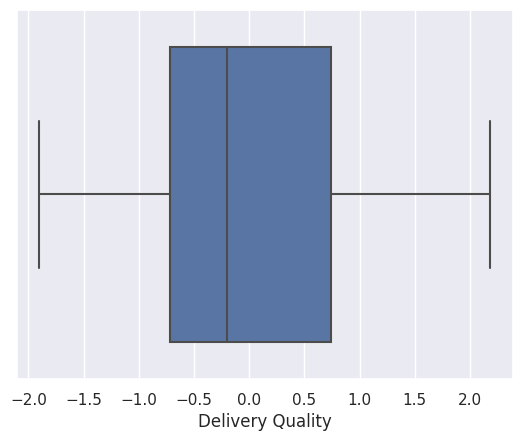

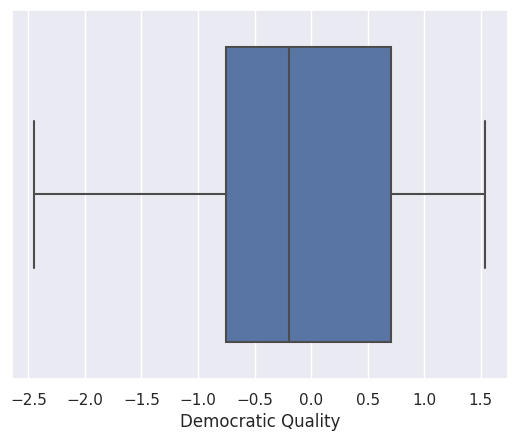

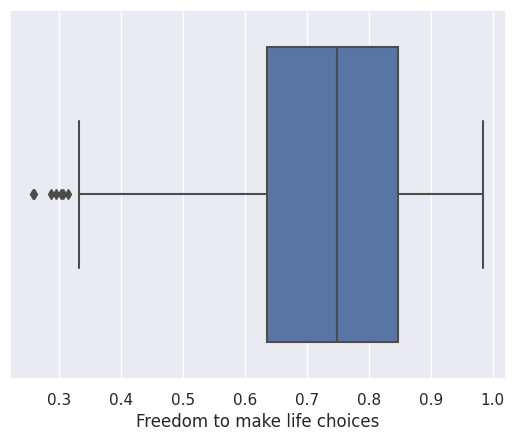

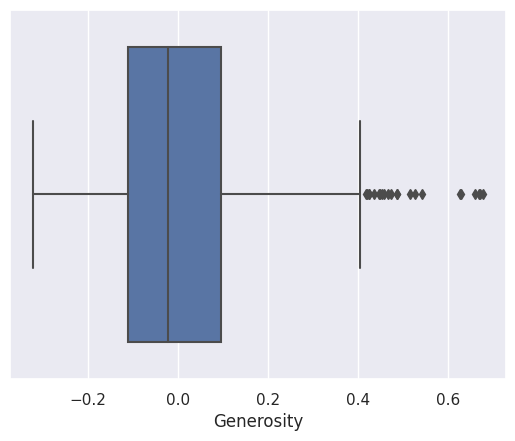

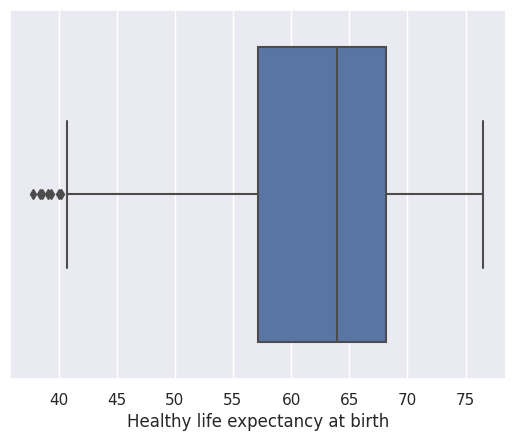

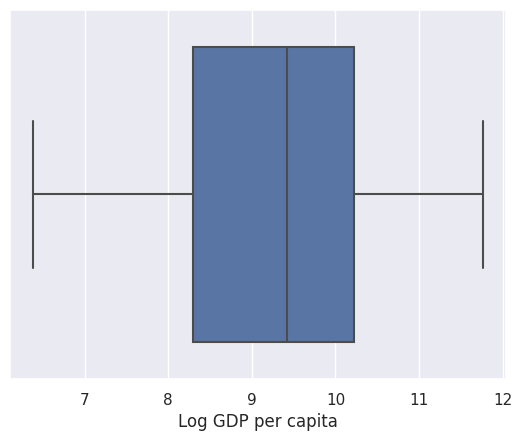

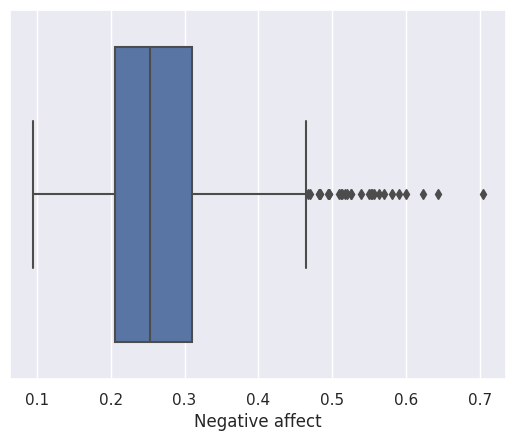

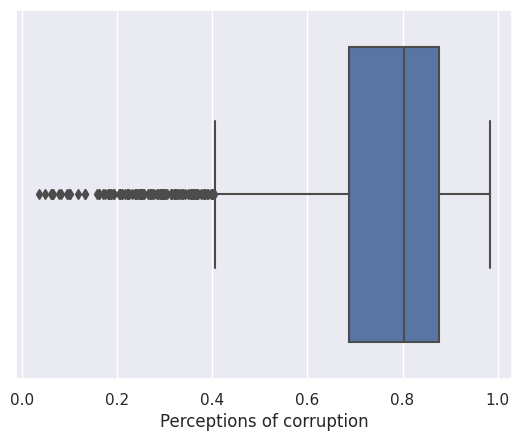

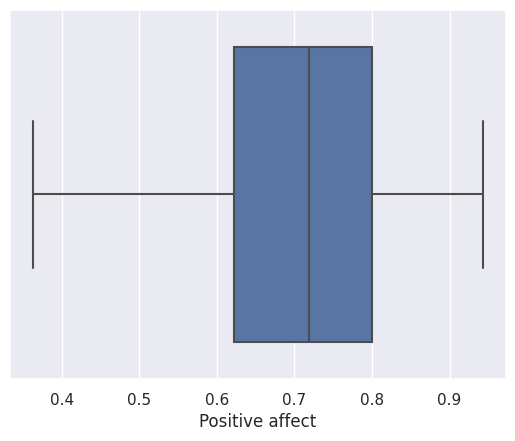

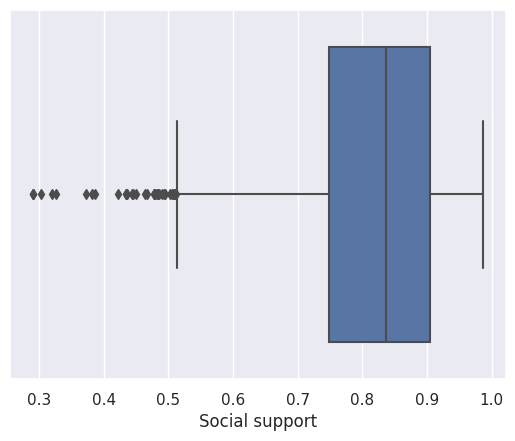

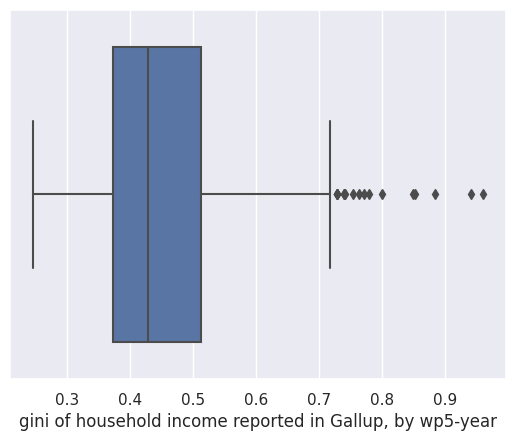

In [115]:
# Use boxplots to detect outliers:
sns.set_theme()

for feature in selected_features:
    sns.boxplot(data=df_filled, x=feature)
    plt.show()

It seems like a lot of these features have a significant number of outliers. I think these outliers are statistically significant because it reflects the differences between countries rather than an error in data entry. I want my model to be able to capture these differences, so I won't be discarding outliers. Instead, I'll apply winsorization so that the effects of the outliers are reduced, but not ignored.

In [116]:
# Perform outlier-capping:
import scipy.stats as stats

for feature in selected_features:
    df_filled[feature] = stats.mstats.winsorize(df_filled[feature], limits=[0.01, 0.01])

df_filled.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Democratic Quality,Delivery Quality,"gini of household income reported in Gallup, by wp5-year"
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.443111,9.230739,0.812070,62.288703,0.731644,0.000603,0.746983,0.709257,0.263896,-0.105756,0.021744,0.447762
std,1.137465,1.193615,0.117371,7.960971,0.143109,0.159812,0.187679,0.106462,0.080123,0.866257,0.976513,0.101086
min,2.661718,6.633399,0.450662,42.407101,0.366844,-0.293943,0.161475,0.465151,0.118177,-1.985066,-1.632130,0.275285
25%,4.584667,8.295688,0.748148,57.122100,0.635519,-0.111074,0.687968,0.621785,0.206298,-0.753249,-0.714758,0.372181
50%,5.347283,9.418533,0.836037,63.920893,0.748546,-0.021688,0.803232,0.718179,0.252736,-0.197343,-0.197523,0.427605
75%,6.314347,10.226751,0.904864,68.199045,0.846935,0.095192,0.876761,0.799767,0.310607,0.705611,0.745860,0.513261
max,8.018934,11.391800,0.967892,74.664474,0.956316,0.447761,0.966879,0.892661,0.519858,1.479439,2.037090,0.729154


NOTE: 

I know that the outlier handling worked because I can compare the results of the "describe()" function from earlier to the current output.



Now I want to take a look at the correlations between the different features. From Module 2.2: Correlation, Covariance, and Mutual Information, it's stated that the general guidelines are to: (1) Select features that have the highest correlation and mutual information against the label. (2) Consider any pairs of features that are highly correlated or have a high mutual information to be redundant, and then remove one of the features in the pair from the data set.

In [117]:
# Create a correlation matrix:
correlation_matrix = round(df_filled.corr(), 5)
correlation_matrix

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Democratic Quality,Delivery Quality,"gini of household income reported in Gallup, by wp5-year"
Life Ladder,1.00000,0.78170,0.70927,0.74217,0.52764,0.20413,-0.45604,0.56282,-0.27268,0.61822,0.71961,-0.30920
Log GDP per capita,0.78170,1.00000,0.66478,0.84899,0.35892,0.00140,-0.38681,0.31634,-0.13309,0.64202,0.78133,-0.40962
Social support,0.70927,0.66478,1.00000,0.59464,0.43035,0.07878,-0.24020,0.47610,-0.36855,0.55296,0.56848,-0.31047
Healthy life expectancy at birth,0.74217,0.84899,0.59464,1.00000,0.35137,0.06013,-0.33144,0.30273,-0.10756,0.61317,0.72903,-0.48043
Freedom to make life choices,0.52764,0.35892,0.43035,0.35137,1.00000,0.36917,-0.50605,0.61208,-0.27523,0.44946,0.48971,0.07846
Generosity,0.20413,0.00140,0.07878,0.06013,0.36917,1.00000,-0.31249,0.38763,-0.11607,0.11180,0.20949,0.23199
Perceptions of corruption,-0.45604,-0.38681,-0.24020,-0.33144,-0.50605,-0.31249,1.00000,-0.30820,0.25357,-0.31322,-0.52781,-0.04795
Positive affect,0.56282,0.31634,0.47610,0.30273,0.61208,0.38763,-0.30820,1.00000,-0.36843,0.39454,0.38283,0.08032
Negative affect,-0.27268,-0.13309,-0.36855,-0.10756,-0.27523,-0.11607,0.25357,-0.36843,1.00000,-0.24894,-0.26335,0.13402
Democratic Quality,0.61822,0.64202,0.55296,0.61317,0.44946,0.11180,-0.31322,0.39454,-0.24894,1.00000,0.86562,-0.16531


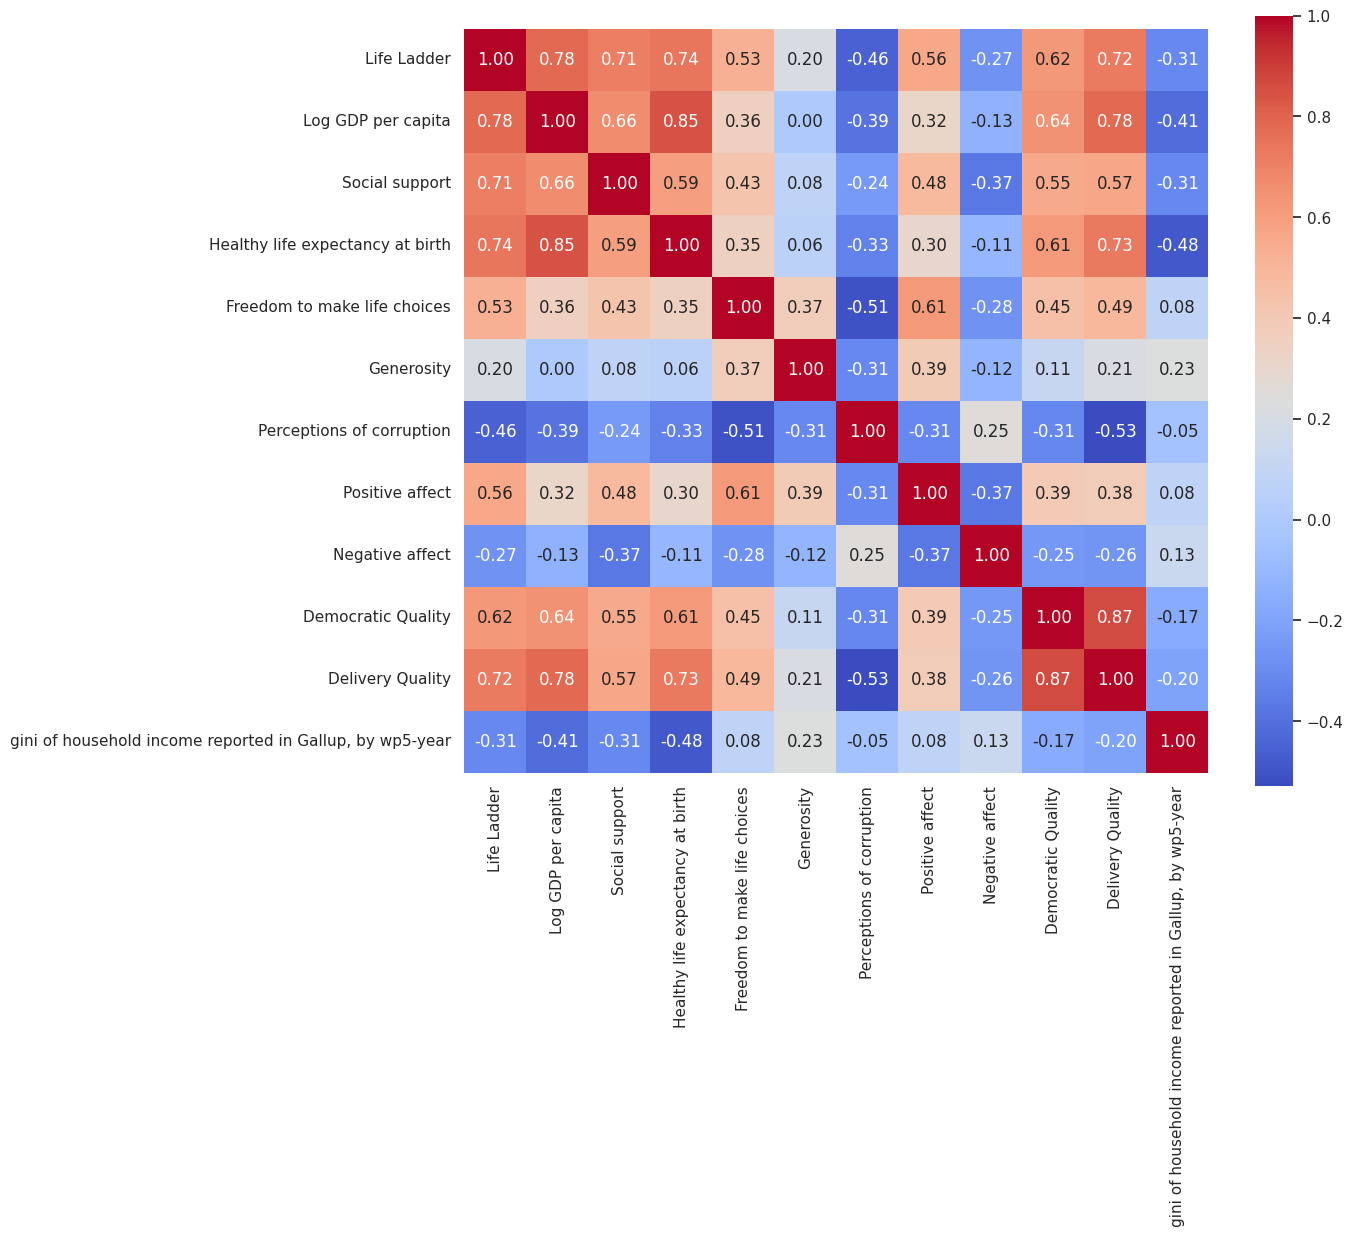

In [118]:
# Visualize the correlation as a heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

In [119]:
# Observe correlations of all features against the label:
correlations_against_label = correlation_matrix["Life Ladder"].sort_values(ascending=False)
print("Correlations of features against \"Life Ladder\" feature:\n")
print(correlations_against_label)

Correlations of features against "Life Ladder" feature:

Life Ladder                                                 1.00000
Log GDP per capita                                          0.78170
Healthy life expectancy at birth                            0.74217
Delivery Quality                                            0.71961
Social support                                              0.70927
Democratic Quality                                          0.61822
Positive affect                                             0.56282
Freedom to make life choices                                0.52764
Generosity                                                  0.20413
Negative affect                                            -0.27268
gini of household income reported in Gallup, by wp5-year   -0.30920
Perceptions of corruption                                  -0.45604
Name: Life Ladder, dtype: float64


In [120]:
# Check for unusually high correlations between features (i.e. > 0.9):
threshold = 0.9
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > threshold)]
print(high_corr)

Series([], dtype: float64)


Great! The features that we're working with right now don't exhibit unusually high correlations with each other.

In [121]:
# Check mutual information values for features against the label:
from sklearn.feature_selection import mutual_info_regression

X = df_filled[selected_features]
y = df_filled["Life Ladder"]

MI_scores = mutual_info_regression(X, y, random_state=42)

MI_series = pd.Series(MI_scores, index=X.columns)
MI_series = MI_series.sort_values(ascending=False)

print("Mutual Information Scores:\n")
print(MI_series)

Mutual Information Scores:

Log GDP per capita                                          0.675531
Healthy life expectancy at birth                            0.556604
Delivery Quality                                            0.521895
Social support                                              0.429501
Democratic Quality                                          0.407037
Freedom to make life choices                                0.266944
Perceptions of corruption                                   0.244680
Positive affect                                             0.243216
Generosity                                                  0.171424
gini of household income reported in Gallup, by wp5-year    0.144474
Negative affect                                             0.114431
dtype: float64


The mutual information scores of these features indicate that they contribute a decent amount of information to our label. Mutual information scores of features against each other aren't scaled, and I'll probably have a difficult time interpreting them with no prior experience, so I'll be skipping over that step.

I think that at this point, I've already decided on my features: that is, I will be keeping "selected_features" as my feature list. 

Now that I know what features I want, I also need to start thinking about what models are appropriate for my task. In this course, we've explored three different baseline models that are appropriate for regression-type problems: KNN, decision trees, and linear regression models. I will be working with each of these to identify the best performing one. Some of these models (KNN and linear regression) are sensitive to scale. If you examine the min and max values for the features I've selected, most of the features are actually on the same scale, which is expected because most of these features were gathered based on a rating system. I will still be performing scaling just to be safe, regardless.

In order to evaluate model performance, I will be analyzing the RMSE and R^2 values (these are common metrics for regression models). If further improvement is necessary, I will need to perform out-of-sample validation, hyperparameter selection, as well as more in-depth feature selection techniques. I am also considering using ensemble modeling.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

NOTE:

(I didn't realize that there were sections specifically reserved for defining the project plan + implementing it, so a bulk of the content of this project is in Part 3.)

Reiterating what I've explained in Part 3:

I do have a new feature list stored in "selected_features". These new features are: "Log GDP per capital", "Healthy life expectancy at birth", "Delivery Quality", "Social support", "Democratic Quality", "Freedom to make life choices", "Perceptions of corruption", "Positive affect", "Generosity", "gini of household income reported in Gallup, by wp5-year", and "Negative affect". These will be used to predict the "Life Ladder" label.

The data preparation techniques that I will use to prepare my data for modeling are data exploration, replacing/handling missing features, outlier detection/handling, and also examining redundancy between features and checking feature relevance.

I will be using all three regression models that I've learned in this course (KNN, decision trees, and linear regression) and selecting the best performing one.

I will be splitting my dataset into training, validation, and testing sets. Since these are regression models, I will use RMSE and R^2 to evaluate their performance, and if further improvements are necessary, I will be optimizing the model through feature selection and hyperparameter selection techniques. Ensemble modeling will be the last but optional step.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [122]:
# General modeling packages:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

# KNN modeling packages:
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree modeling packages:
from sklearn.tree import DecisionTreeRegressor

# Linear Regression modeling packages:
from sklearn.linear_model import LinearRegression

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

MODEL TRAINING:

Since I've already completed the data preparation phase, I will be moving on to model training. 

The first step is to split the dataset, then scale my features. Since I already know that I'll be splitting the dataset into a training (60%), validation (20%), and testing segment (20%), I will be scaling on the training portion and then applying that scale to the rest of the data so as to avoid data leakage (i.e., I don't want the model to "see" any information regarding the testing and validation set until I'm ready to evaluate its performance).

In [123]:
# Split dataset:
X = df_filled[selected_features]
y = df_filled["Life Ladder"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=4)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4)

In scikit-learn's documentation, there are different types of scalers that we can choose from: "StandardScaler", "MinMaxScaler", "RobustScaler", "MaxAbsScaler", "PowerTransformer", "QuantileTransformer", and "Normalizer". Since I don't have a very good grasp of what actually happens for the transformations in the last three scalers, I won't be considering them for the purposes of this project.

"StandardScalar" -> "cannot guarantee balanced feature scales in the presence of outliers."

"MinMaxScalar" -> "very sensitive to the presence of outliers."

"RobustScalar" -> "the centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers."

"MaxAbsScaler" -> "similar to MinMaxScaler except that the values are mapped across several ranges depending on whether negative OR positive values are present. If only positive values are present, the range is [0, 1]. If only negative values are present, the range is [-1, 0]. If both negative and positive values are present, the range is [-1, 1]. On positive only data, both MinMaxScaler and MaxAbsScaler behave similarly. MaxAbsScaler therefore also suffers from the presence of large outliers."

Since I already know that my features are consistently skewed, contain a significant number of outliers, and have both positive and negative values, I will be using RobustScaler.

In [124]:
# Scale on training set:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply scaling to validation and test data:
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Need to convert NumPy arrays back to dataframes:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Now it's time to train a KNN model. KNN models are examples of instance-based learning models, meaning that models store training examples in memory and use them on-demand to make predictions. When making predictions, KNN models look for the K most similar examples based on a provided distance function, and then use those examples' labels as predictive tools. KNN models work best when the dataset contains few features (lower dimensionality) and many classes in the prediction bracket. The primary hyperparameter for KNN models will be the K value. I will also be experimenting with the Euclidean distance function and the Manhattan distance function (I will not be considering the Mahalanobis distance function because I've already determined that the features have little correlation with each other, and I've already scaled the data, which would have been the primary advantages of the distance function).

In [125]:
# Create KNN model:
KNN_model = KNeighborsRegressor()

Since I don't want to manually iterate over hyperparameters, I'll be performing grid search cross validation to automate the process for me.

In [126]:
# Set up parameter grid:
param_grid = {
    'n_neighbors': list(range(1, 21)),         
    'metric': ['euclidean', 'manhattan'],        
    'weights': ['uniform', 'distance']        
}

# Run grid search:
print("Running Grid Search...")

grid = GridSearchCV(
    estimator=KNN_model,
    param_grid=param_grid,
    cv=5,
    verbose=1
)

grid_search = grid.fit(X_train_scaled, y_train)

print("Done")

# Retrieve the best hyperparameter values:
best_parameters = grid_search.best_params_

print("\nThe following are the best parameters for our KNN model:\n")
best_parameters

Running Grid Search...
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Done

The following are the best parameters for our KNN model:



{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Now that we have our optimal hyperparameters, we can train a KNN model using what we've discovered, then evaluate its performance using the validation set.

In [127]:
# Train KNN model:
best_KNN_model = KNeighborsRegressor(n_neighbors=3, metric="manhattan", weights="distance")
best_KNN_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights='distance')

In [128]:
# Make predictions using fitted KNN model:
y_val_predicted = best_KNN_model.predict(X_val_scaled)

# Evaluate using R^2:
r2 = r2_score(y_val, y_val_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_val, y_val_predicted)
print("RMSE score:", RMSE)

R^2 score: 0.8896391603323553
RMSE score: 0.3834270181902121


Our R^2 score indicates that ~89% of the variation in our "Life Ladder" feature can be explained by our model. A perfect score would be 1, and 0 would mean that there is no explanatory value.

Our RMSE score means that, on average, our predictions are off by 0.38 units. Considering that our "Life Ladder" scale ranges from 2.66 to 8.01, this is a very insignificant amount.

We can also visualize the performance of this model!

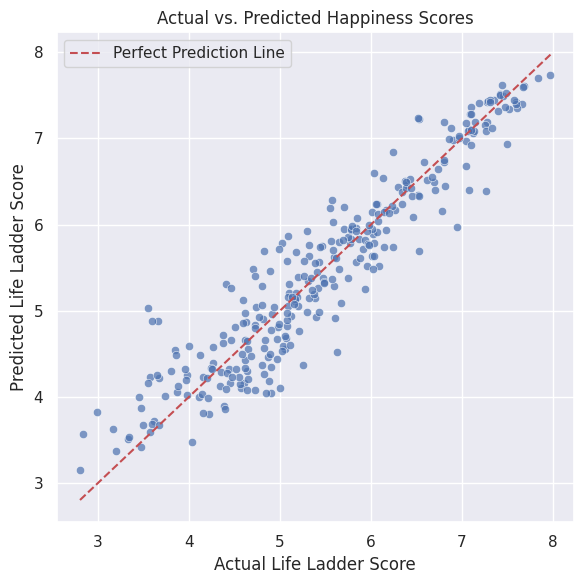

In [129]:
# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_val_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

VERDICT:

Our KNN model performs very well! The predicted values all lie very close to our ideal prediction line.

Now I'll be moving on to training a decision tree model. Decision tree models split the data set to perform computations much faster than KNN models. Our dataset was not too large, so this isn't really an advantage for this problem specifically, but just something to keep in mind. The theory behind decision tree models is "Information Theory": when building a decision tree, our goal is to reduce uncertainty in the data while also increasing the information that we're extracting from it. That is, we want to find features that provide us with the most information about the label and then split the data according to those features. The primary hyperparameters behind decision trees are the maximum depth and maximum samples per leaf. 

NOTE: 

Decision trees are NOT sensitive to scaling. I will be usng the original, unscaled dataset instead of the scaled version.

In [130]:
# Create decision tree model:
decision_tree_model = DecisionTreeRegressor()

Once again, I will be performing grid search cross validation to discover the best parameters.

In [131]:
# Set up parameter grid:
param_grid = {
    'max_depth': [3, 5, 10, 20, 50, None],                  
    'min_samples_split': [2, 5, 10],                
    'min_samples_leaf': [1, 2, 5, 10]             
}

# Run grid search:
print("Running Grid Search...")

grid = GridSearchCV(
    estimator=decision_tree_model,
    param_grid=param_grid,
    cv=5,
    verbose=1
)

grid_search = grid.fit(X_train, y_train)

print("Done")

# Retrieve the best hyperparameter values:
best_parameters = grid_search.best_params_

print("\nThe following are the best parameters for our decision tree model:\n")
best_parameters

Running Grid Search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Done

The following are the best parameters for our decision tree model:



{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}

Once again, we train our decision tree model with the discovered hyperparameter values and evaluate its performance against the validation set.

In [132]:
# Train decision tree model:
best_decision_tree_model = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=2)
best_decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)

In [133]:
# Make predictions using fitted decision tree model:
y_val_predicted = best_decision_tree_model.predict(X_val)

# Evaluate using R^2:
r2 = r2_score(y_val, y_val_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_val, y_val_predicted)
print("RMSE score:", RMSE)

R^2 score: 0.7836542781479725
RMSE score: 0.536845565361019


Comparing these scores against our KNN model, it seems as though our decision tree model performs rather poorly in comparison.

Let's visualize this model as well.

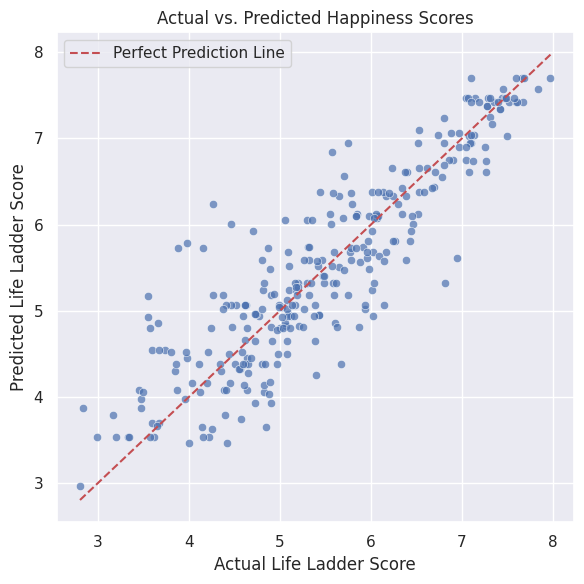

In [134]:
# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_val_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As expected based on our evaluation metrics, our decision tree model's predictions are spread out further from the true label values.

VERDICT: 

KNN outperforms decision tree.

Finally, I'll be using a linear regression model. Linear regression aims to find a linear relationship between one or more features and a label. It makes the assumption that the relationship between the features and label can be described well by a straight line, and then uses the line to make predictions. There are two types of linear regression models: simple linear regression models and multiple linear regression models. Simple linear regression models discover the linear relationship between one feature and one label; multiple linear regression models discover the linear relationship between multiple features and one label. For our purposes, we will be using a multiple linear regression model.

NOTE:

I am going to use the scaled dataset for linear regression modeling.

In [135]:
# Create linear regression model:
linear_regression_model = LinearRegression()

# Fit model to training data:
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions using linear regression model:
y_val_predicted = linear_regression_model.predict(X_val_scaled)

# Evaluate using R^2:
r2 = r2_score(y_val, y_val_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_val, y_val_predicted)
print("RMSE score:", RMSE)

R^2 score: 0.7634945622758269
RMSE score: 0.5613009527282027


Just as with the decision tree model, it seems as though our linear regression model performs worse than our KNN model. 

We can visualize its performance too.

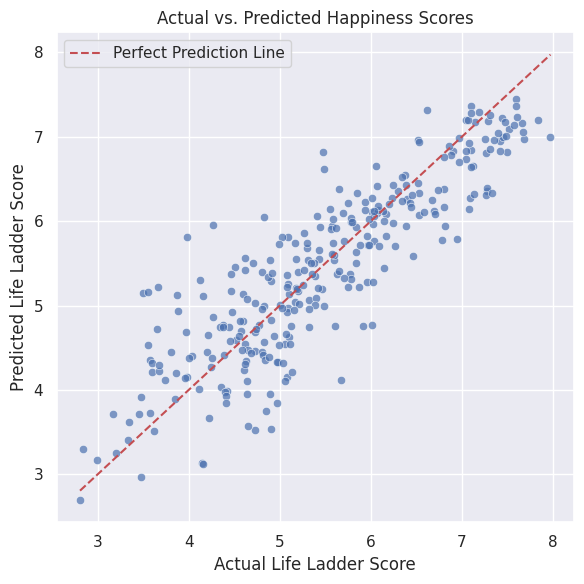

In [136]:
# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_val_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now that I've seen the performance of all three regression models, I've decided that I will be moving forward with the KNN model. Since I've already used grid search cross-validation to select the optimal combination of hyperparameters, I will be moving on to more in-depth feature selection next: that is, I will be selecting the top most predictive features to use for my KNN model to see if performance improves. This is also a plus for KNN models because they work best with less features. Because KNN models are instance-based models, they don't internally assign weights to features. Instead, I will be referring back to my mutual information values from the data preparation phase and selecting the features with the highest mutual information against the label.

I've chosen the top five features: "Log GDP per capita", "Healthy life expectancy at birth", "Delivery Quality", "Social support", and "Democratic Quality". Now let's train the model again on these features and see how it performs.

R^2 score: 0.8646573053763353
RMSE score: 0.4246123519112194


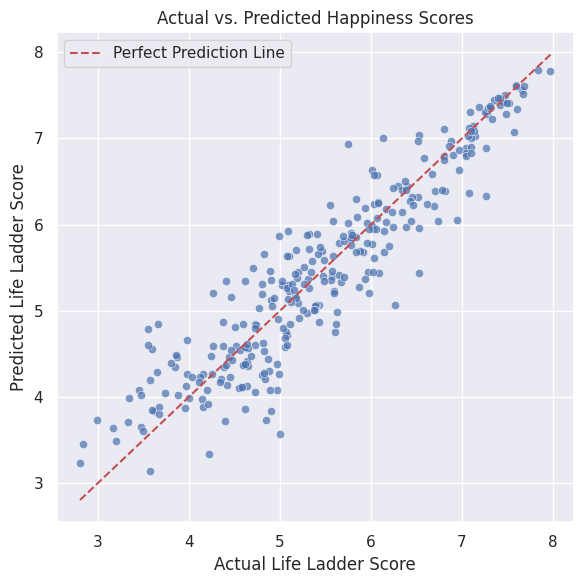

In [137]:
# Create a list of the top five features:
top_5_features = ["Log GDP per capita", "Healthy life expectancy at birth", "Delivery Quality", "Social support", "Democratic Quality"]

# Apply feature selection to existing splits:
X_train_top_5 = X_train_scaled[top_5_features]
X_val_top_5 = X_val_scaled[top_5_features]
X_test_top_5 = X_test_scaled[top_5_features]

# Train a second KNN model using these five features and original hyperparameters:
KNN_model_test = KNeighborsRegressor(n_neighbors=3, metric="manhattan", weights="distance")
KNN_model_test.fit(X_train_top_5, y_train)

# Make predictions using fitted KNN model:
y_val_predicted = KNN_model_test.predict(X_val_top_5)

# Evaluate using R^2:
r2 = r2_score(y_val, y_val_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_val, y_val_predicted)
print("RMSE score:", RMSE)

# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_val_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Recall that the KNN model that we trained earlier had these evaluation metrics:

R^2 score: 0.8896391603323553

RMSE score: 0.3834270181902121

So feature selection actually decreased the performance of the model. In this case, I will be sticking with the original KNN model.

Now we can evaluate our model's performance on the test data set.

R^2 score: 0.8795843569985955
RMSE score: 0.4066716107849737


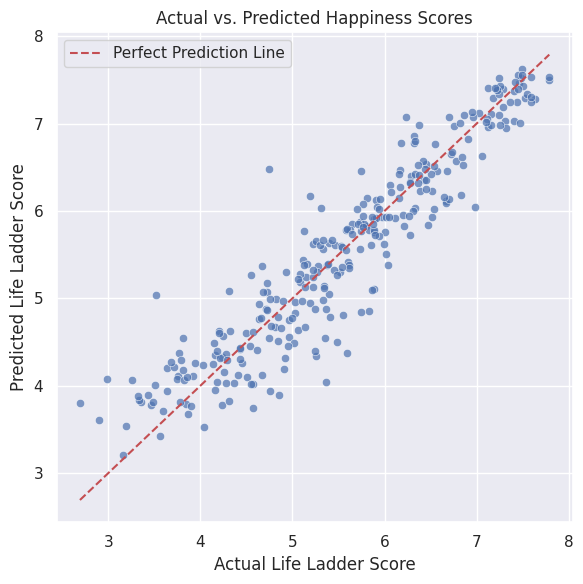

In [138]:
# Make final predictions:
y_test_predicted = best_KNN_model.predict(X_test_scaled)

# Evaluate using R^2:
r2 = r2_score(y_test, y_test_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_test, y_test_predicted)
print("RMSE score:", RMSE)

# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

I'm satisfied with the performance of my KNN model. It performs well on the test set.

To summarize the details of this model:

The best performing model for predicting the "Life Ladder" label was a KNN model with the parameters:

n_neighbors=3, metric="manhattan", weights="distance"

It's evaluation metrics were as follows:

R^2 score: 0.8795843569985955

RMSE score: 0.3834270181902121

These scores indicate that the model's performance did worsen slightly when making predictions on the validation set versus on the testing set, but the decrease in performance is so small that it is acceptable.

OPTIONAL:

I will be using the rest of this notebook for ensemble modeling methods, if time permits. 

Due to time constraints, I'll only be going over the Random Forest model, which uses the bagging/bootstrap aggregation technique to reduce a model's overall estimation variance by taking averages over slightly different, but similar models. Random Forest is essentially a set of decision trees that vary slightly in that they train on different portions of the data and use different variations of the dataset features at each split. The hyperparameters of the decision trees are consistent throughout the forest. Each individual tree makes a prediction, which is then simply averaged with other predictions to get an overall value. The n_estimators hyperparameter for the Random Forest model is the most important hyperparameter (it represents the number of trees in the forest). We also need to consider the number of features k to sample. As for the individual decision trees, it is recommended that they are overfit during the training process.

NOTE:

The training procedure for random forests is as follows:

1. Define bootstrap iterations (i.e. the number of trees you want to use in the ensemble).
2. Sample the data randomly, with replacement. The bootstrap data will be as large as the original dataset, but the data points themselves can occur more than once within the new dataset.
3. Build a decision tree on each bootstrap dataset. Each decision tree should randomly select a subset of available features.
4. Add the decision tree to the ensemble.
5. Use the set of decision trees to make predictions, then average these predictions.

The default choices for the hyperparameters provided by the Random Forest Cheat Sheet state that Random Forests are insensitive to hyperparameters. The default choices for n_estimators are 100 or 1000 (i.e. a value large enough until the predictions converge). Since this is just for my experimentation, I want to prioritize reducing training time and will pick 100 trees.

In [139]:
# Random Forest modeling packages:
from sklearn.ensemble import RandomForestRegressor

Random Forest models don't require scaling, and scikit-learn v1.4 supports NaN values. Out of curiousity, I will be training two different Random Forest regressors: one that uses the prepared dataset with selected features and another that uses the raw dataset. I will not use scaled data.

Implementing Random Forest using prepared data...
R^2 score: 0.8722412475962975
RMSE score: 0.4125442565306998
Done


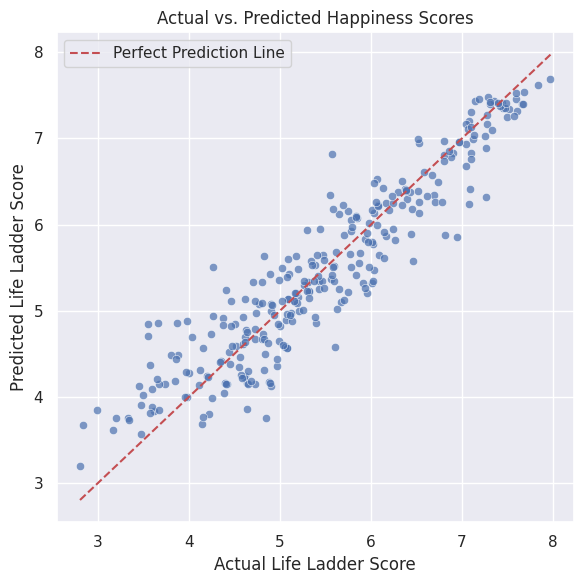

In [140]:
# Train Random Forest regressor on prepared dataset:
print("Implementing Random Forest using prepared data...")

# Create Random Forest model with 100 estimators:
RF_prepared_model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data:
RF_prepared_model.fit(X_train, y_train)

# Use model to predict on validation data:
y_val_predicted = RF_prepared_model.predict(X_val)

# Evaluate using R^2:
r2 = r2_score(y_val, y_val_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_val, y_val_predicted)
print("RMSE score:", RMSE)

print("Done")

# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_val_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The performance of this Random Forest model is actually quite comparable to our KNN model, and it outperforms the normal decision tree as well as linear regression model.

Now to move on to the Random Forest model that uses the unprepared dataset. Note that I will still be dropping the statistical companion features as well as the year.

Implementing Random Forest using unprepared data...

Selected features:

 ['Delivery Quality', 'Democratic Quality', 'Freedom to make life choices', 'Generosity', 'Healthy life expectancy at birth', 'Log GDP per capita', 'Negative affect', 'Perceptions of corruption', 'Positive affect', 'Social support', 'gini of household income reported in Gallup, by wp5-year']
R^2 score: 0.8774814653955084
RMSE score: 0.3942106089687078
Done


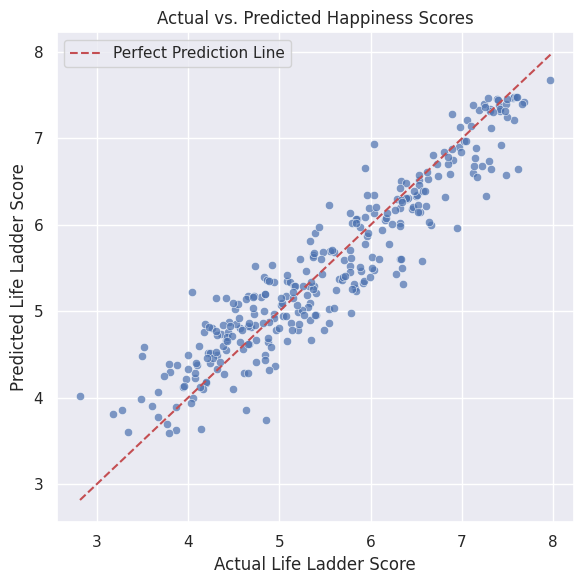

In [141]:
# Train Random Forest regressor on unprepared dataset:
print("Implementing Random Forest using unprepared data...")

# Drop statistical companion features & "year" from dataframe copy:
df_copy = df_copy.drop(columns=["year"])
df_copy = df_copy.drop(columns=["Standard deviation of ladder by country-year"])
df_copy = df_copy.drop(columns=["Standard deviation/Mean of ladder by country-year"])

# Split copy of original dataframe into training, validation, and testing sets:
target_col="Life Ladder"
id_col="country"

selected_features_copy = df_copy.columns.difference([id_col, target_col]).tolist()
print("\nSelected features:\n\n", selected_features)

X_copy = df_copy[selected_features_copy]
y_copy = df_copy["Life Ladder"]

X_copy_train, X_copy_temp, y_copy_train, y_copy_temp = train_test_split(X_copy, y_copy, test_size=0.4, random_state=42)

X_copy_val, X_copy_test, y_copy_val, y_copy_test = train_test_split(X_copy_temp, y_copy_temp, test_size=0.5, random_state=42)

# Create Random Forest model with 100 estimators:
RF_unprepared_model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data:
RF_unprepared_model.fit(X_copy_train, y_copy_train)

# Use model to predict on validation data:
y_val_predicted = RF_unprepared_model.predict(X_copy_val)

# Evaluate using R^2:
r2 = r2_score(y_copy_val, y_val_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_copy_val, y_val_predicted)
print("RMSE score:", RMSE)

print("Done")

# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_copy_val, y=y_val_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_copy_val.min(), y_copy_val.max()], [y_copy_val.min(), y_copy_val.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

It looks like when we overfit the trees, the predictive ability of the model actually improved! Although it seems like performance still doesn't quite catch up with the KNN model, this is so close that you could pick either as the final model. I want to see how well this particular random forest model performs when I evaluate it against the test set.

R^2 score: 0.8726983590002965
RMSE score: 0.4089996130475923
Done


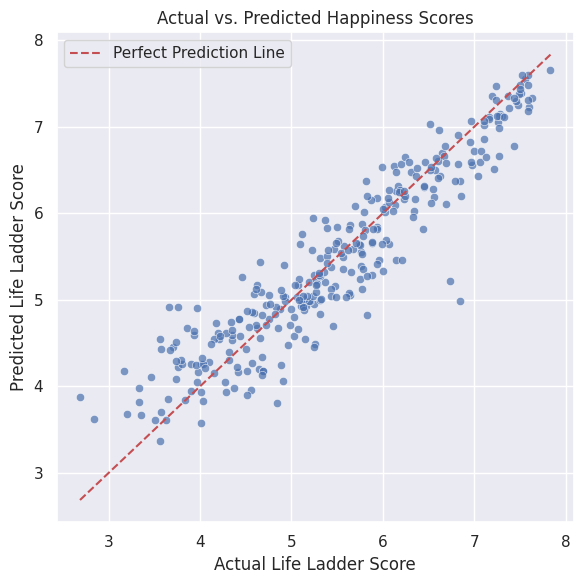

In [142]:
# Make final predictions:
y_test_predicted = RF_unprepared_model.predict(X_copy_test)

# Evaluate using R^2:
r2 = r2_score(y_copy_test, y_test_predicted)
print("R^2 score:", r2)

# Evaluate using RMSE:
RMSE = root_mean_squared_error(y_copy_test, y_test_predicted)
print("RMSE score:", RMSE)

print("Done")

# Use a scatterplot to graph our model's predictions:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_copy_test, y=y_test_predicted, alpha=0.7)

# Plot what the "perfect" predictions would be as a line:
plt.plot([y_copy_test.min(), y_copy_test.max()], [y_copy_test.min(), y_copy_test.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Life Ladder Score")
plt.ylabel("Predicted Life Ladder Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The performance slightly decreased, but it still performs well. Overall, if I had to pick between the KNN model and this one, I'd actually pick the Random Forest model as the final production model. This is for a few reasons (not only because the performance is nearly the same):

1. Random Forest models make inferences much faster than KNN models beccause the trees are pre-trained, whereas KNN is an instance-based model, meaniing it repeats all computations every time it attempts to make a prediction.
2. The dataset we're working with is rather small, so even though our Random Forest model takes more time to train in general, it is unnoticeable for the purposes of this task.
3. In general, Random Forest models are more scalable than KNN models.
4. I feel more confident in the ability of Random Forest models because they are more robust as they take the average of multiple models' predictions, not just the prediction of a single one.

CONCLUDING THOUGHTS:

1. I feel as though I could have done more to improve the performance of my final KNN model. Even though I performed feature selection and hyperparameter selection, there were still some steps that I could have taken earlier in the data preparation stage to optimize the model. For example, I could have experimented with the different feature scalers, or I could have applied feature transformation techniques to the filled dataset to better handle the distributions and outliers (i.e. log transformation).

2. Going forward, I'm considering building a GUI for my KNN and Random Forest models so that they're more accessible to users.
   
This concludes the end of the project! Thank you for taking the time to read through my commentary and code!